In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('tableau-colorblind10')

In [4]:
train_labels_df = pd.read_csv("../data/raw/train_labels.csv")
train_values_df = pd.read_csv("../data/raw/train_values.csv")
train_df = train_values_df.merge(train_labels_df, on='building_id', how='inner')
train_df['damage_grade'] = train_labels_df['damage_grade'].replace({1: 'Low damage', 2: 'Medium damage', 3: 'Serious damage'})

Con el fin de determinar los daños que pueden produccir los futuros terremotos es necesario conocer los distintos tipos de estructuras y su comportamiento ante los diferentes movimientos de suelo para ello contamos con datos sobre el tipo de materiales utilizados en las edificaciones que recibieron daño en el terremoto. En base al analisis obtenido se podria mejorar los tipos de construcciones y hacer mas estrictos los controles de calidad en obras de reciente construcion

Para empezar con nuestro analisis podemos empezar por ver como son las construcciones que recibieron daño para luego ver el tipo de daño que recibieron.

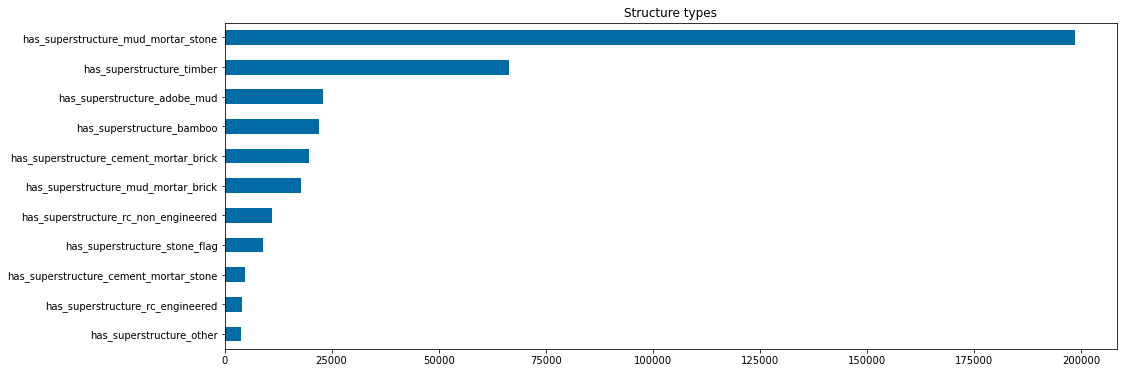

In [9]:
columnas = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']
train_df[columnas].sum().sort_values().plot.barh(title='Structure types',figsize=(16,6))
# Save graphic
plt.savefig('../reports/figures/Structure_types.png')
plt.show()

Observamos que la mayor parte de las estructuras que recibieron daño fue construida con barro-piedra seguida de las fueron construidas con Timber (madera específica para la construcción) y las que fueron construidas con adobe/barro.

Las construcciones que menos daño recibieron son las construidas con concreto reforzado diseñado y las construidas con cemento-piedra.

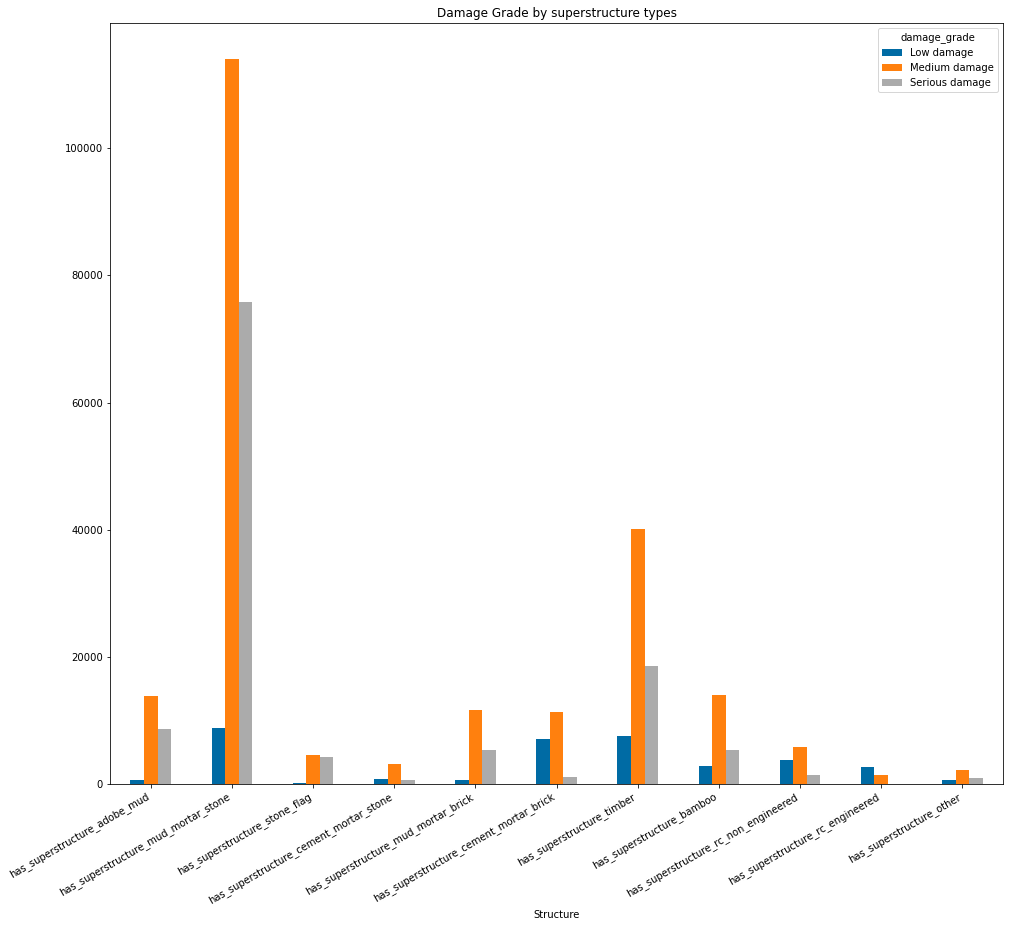

In [6]:
columnas = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']
train_df[columnas].groupby('damage_grade').sum().rename_axis('Structure', axis=1).T.plot.bar(title='Damage Grade by superstructure types', figsize=(16,14))
plt.xticks(rotation=30, ha='right')
# Save graphic
plt.savefig('../reports/figures/Damage_superstructure.png')
plt.show()

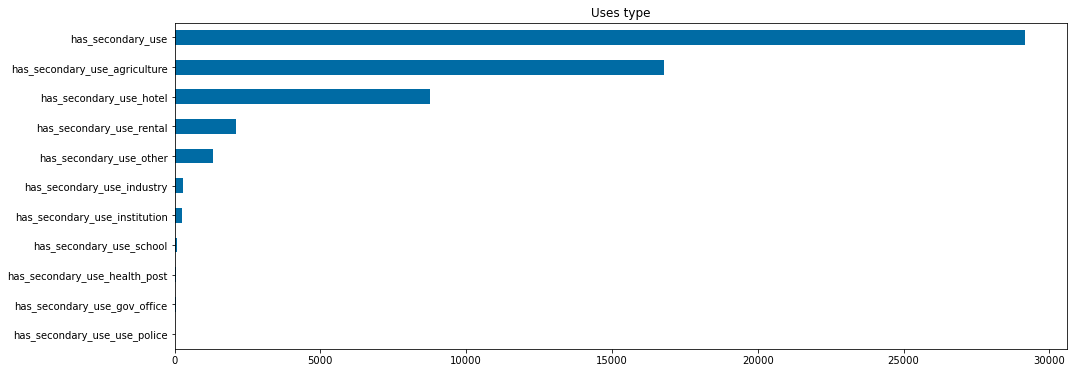

In [10]:
columnas = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']
train_df[columnas].sum().sort_values().plot.barh(title='Uses type',figsize=(16,6))
# Save graphic
plt.savefig('../reports/figures/Uses_type.png')
plt.show()
plt.show()

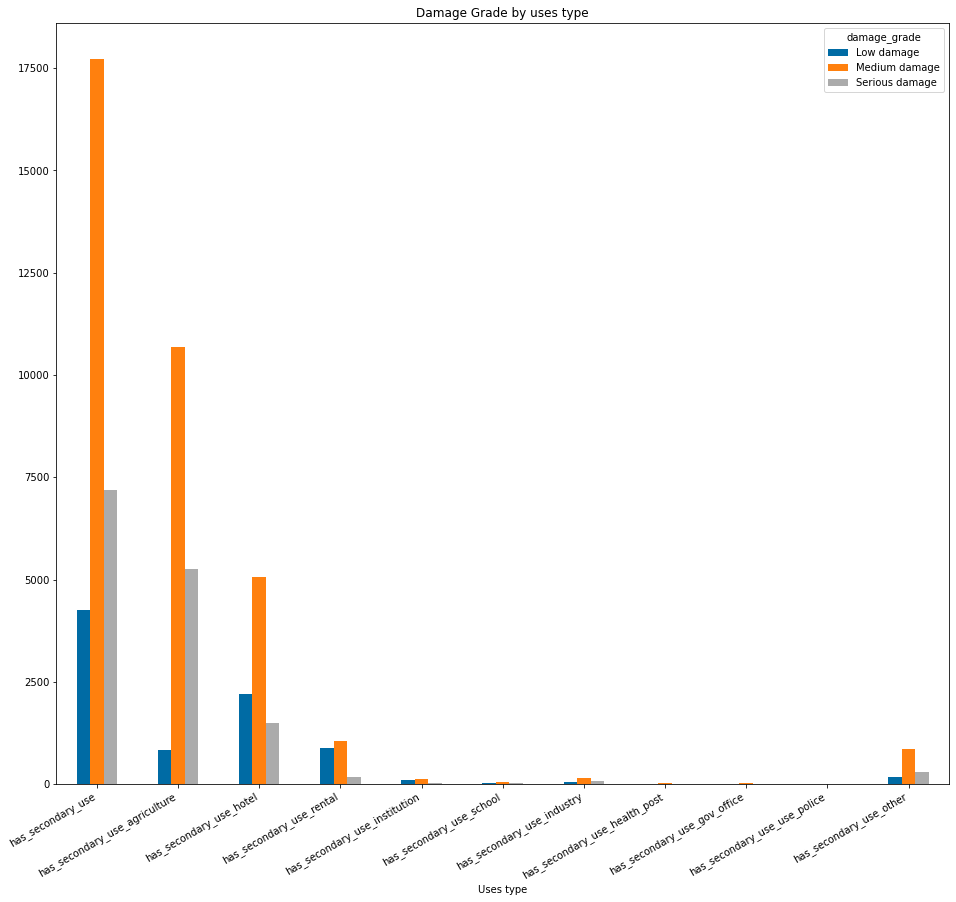

In [8]:
columnas = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','damage_grade']
train_df[columnas].groupby('damage_grade').sum().rename_axis('Uses type', axis=1).T.plot.bar(title='Damage Grade by uses type', figsize=(16,14))
plt.xticks(rotation=30, ha='right')
# Save graphic
plt.savefig('../reports/figures/Damage_uses.png')
plt.show()